<a href="https://colab.research.google.com/github/Nosa10/OIBSIP/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_df = pd.read_csv("/content/Housing.csv")
print(housing_df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [188]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [189]:
housing_df.shape

(545, 13)

In [190]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [191]:
housing_df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Let's check for outliers

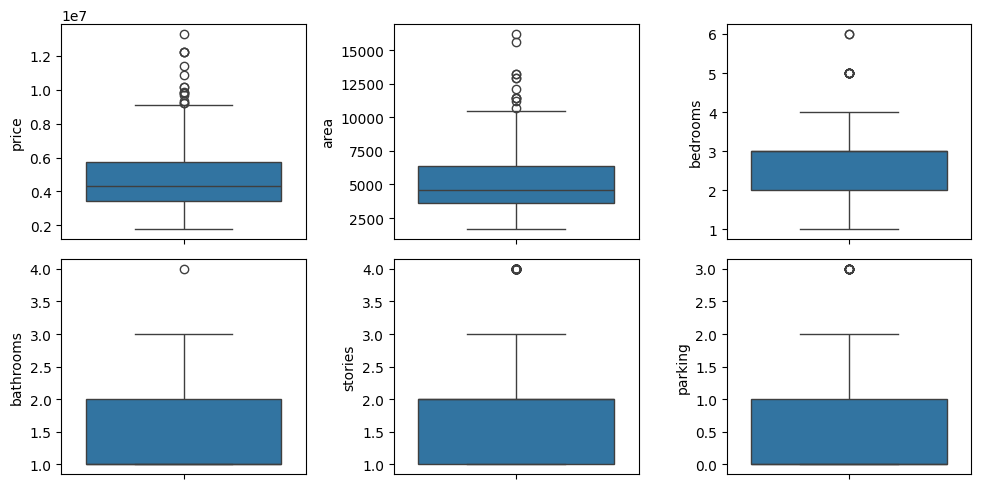

In [192]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing_df['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing_df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing_df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing_df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing_df['parking'], ax = axs[1,2])

plt.tight_layout()

Let's treat the outliers

<Axes: ylabel='price'>

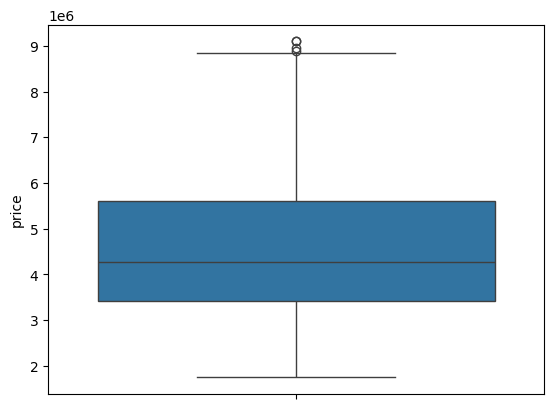

In [193]:
q1 = housing_df['price'].quantile(0.25)
q3 = housing_df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
housing_df = housing_df[(housing_df['price'] >= lower_bound) & (housing_df['price'] <= upper_bound)]

sns.boxplot(housing_df['price'])

<Axes: ylabel='area'>

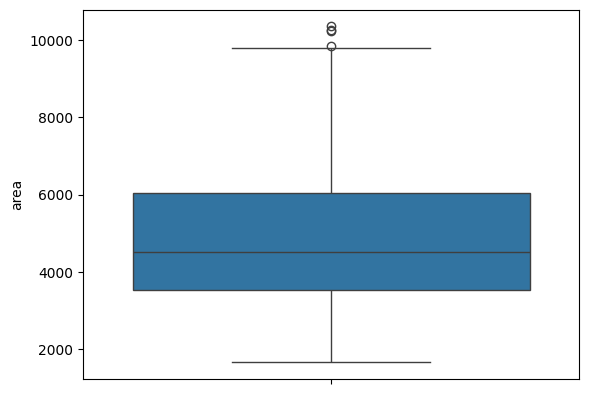

In [194]:
q1 = housing_df['area'].quantile(0.25)
q3 = housing_df['area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
housing_df = housing_df[(housing_df['area'] >= lower_bound) & (housing_df['area'] <= upper_bound)]

sns.boxplot(housing_df['area'])

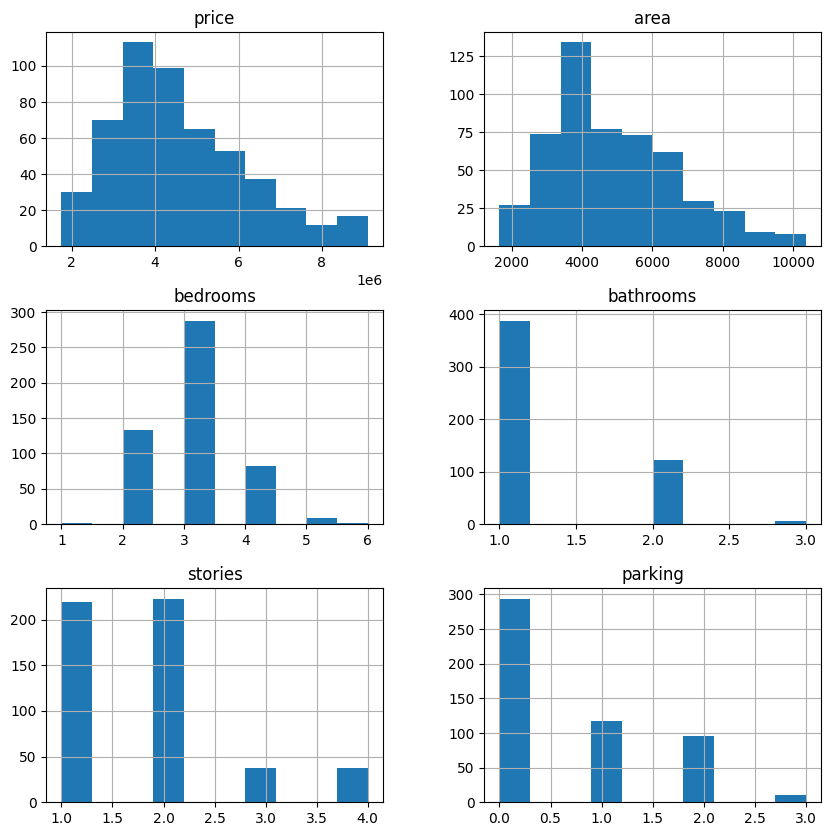

In [195]:
housing_df.hist(figsize = (10,10))
plt.show()

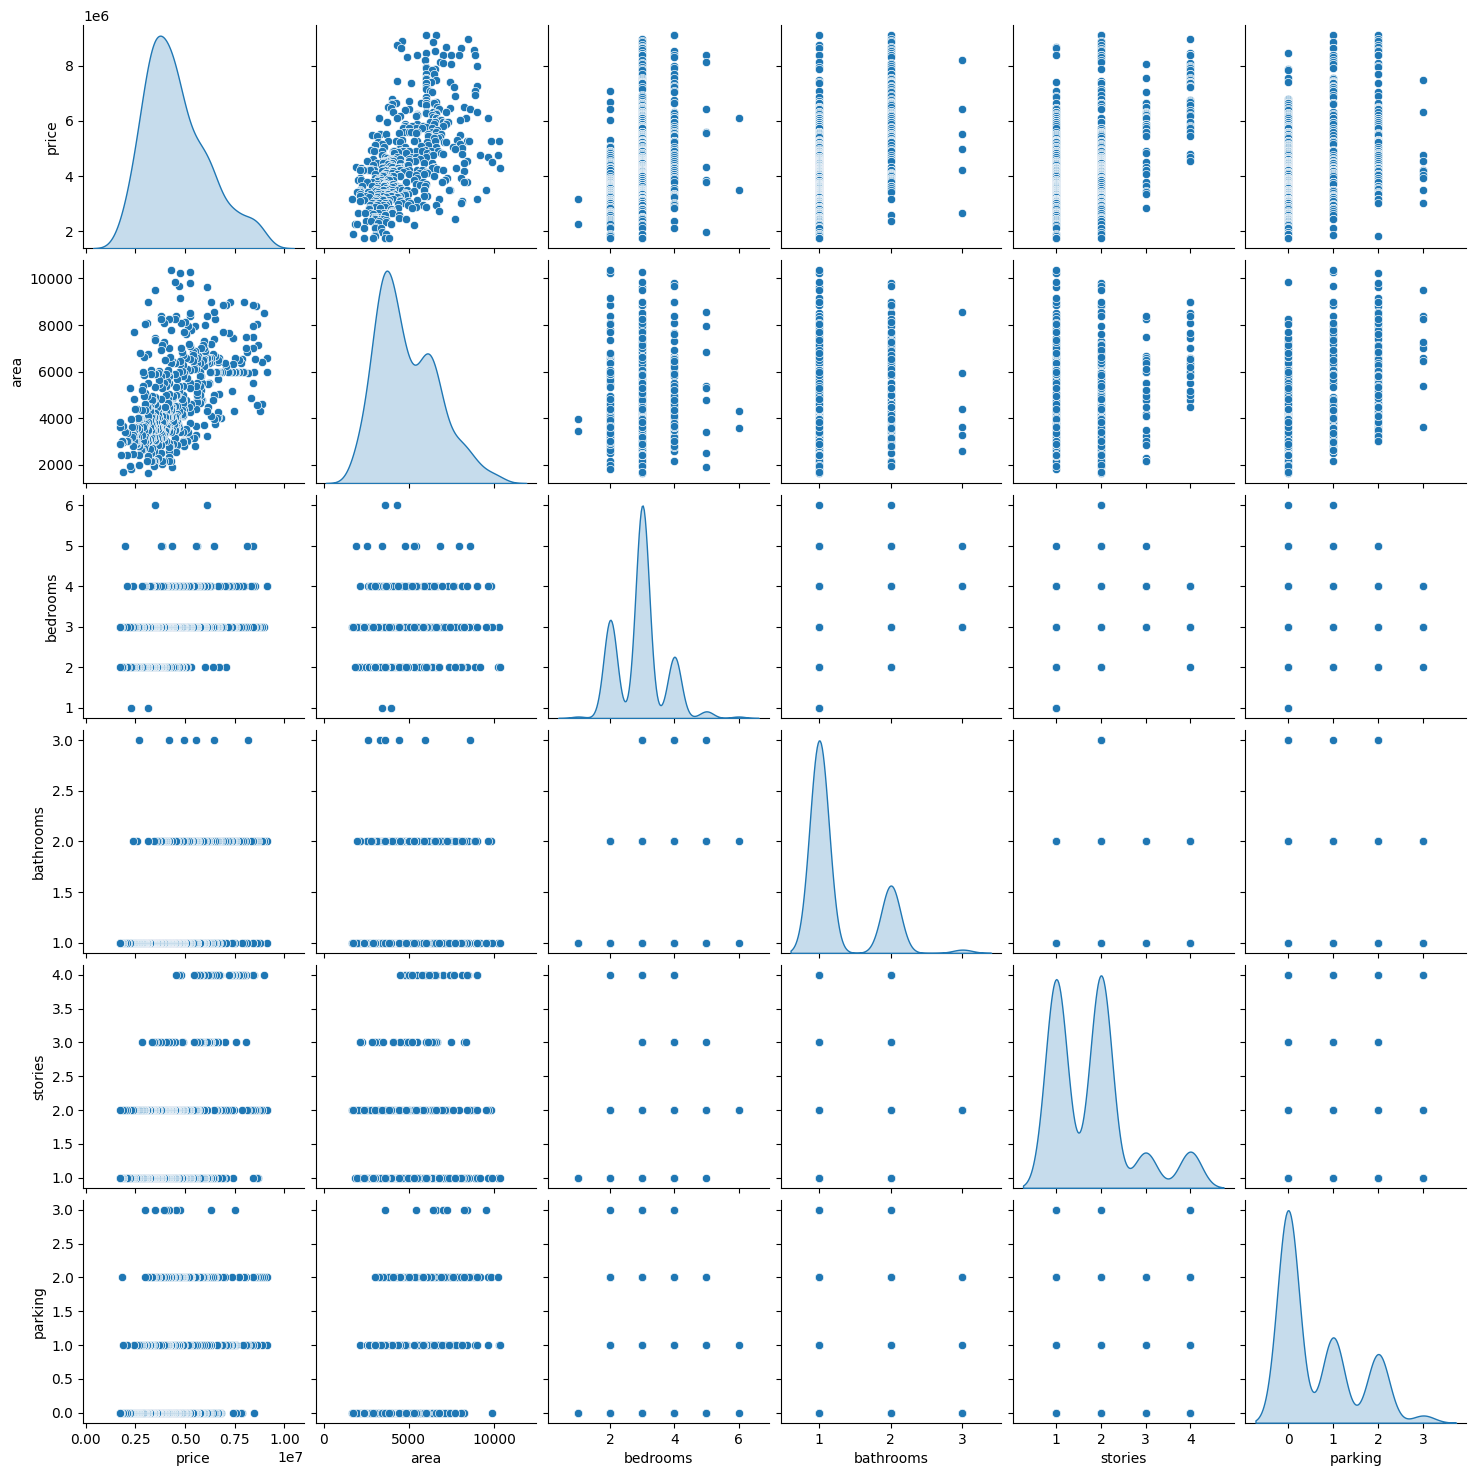

In [196]:
sns.pairplot(housing_df,diag_kind='kde')
plt.show()

To get the correlation, we first have to convert all binary values (yes & no) to categorical 1 and 0 respectively

In [197]:
df = housing_df.copy()
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].apply(lambda col: col.map({'yes': 1, 'no': 0}))

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


We have to convert the furnishing status to categorical using dummy variables

In [198]:
df = pd.get_dummies(df, columns=['furnishingstatus'],drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [199]:
binary_columns=['furnishingstatus_semi-furnished','furnishingstatus_unfurnished']
df[binary_columns] = df[binary_columns].apply(lambda col: col.map({True: 1, False: 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


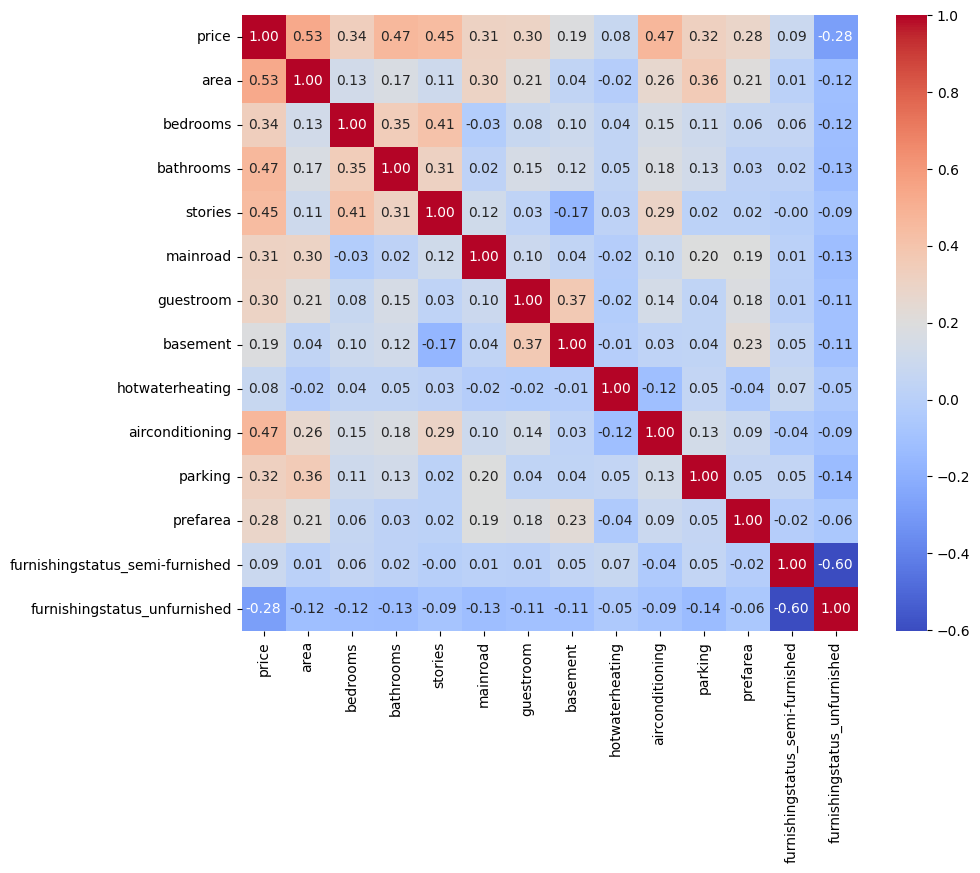

In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm', fmt=".2f", square=True)
plt.show()

Area, Airconditioning, bedroom and stories have the highest correlation with price

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
scaler = MinMaxScaler()
X = df.drop('price', axis=1)
y = df['price']
# Let's scale the non-binary features using MinMaxScaler
continous_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X[continous_features] = scaler.fit_transform(X[continous_features])
y = scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0
16,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1
17,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
18,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0
19,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


Let's do feature selection using rfe

In [202]:
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=13)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features with RFE:", selected_features_rfe)

Selected Features with RFE: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [204]:

selected_features = rfe.support_
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]
X_train_selected.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
356,0.099885,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
199,0.292767,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,0,0
299,0.614237,0.4,0.0,0.000000,1,0,0,0,0,1.000000,0,0,0
525,0.228473,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
208,0.151550,0.4,0.0,0.666667,1,0,0,0,0,0.000000,0,1,0
295,0.077497,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0,1,0
379,0.214696,0.4,0.0,0.000000,1,0,0,0,0,0.666667,1,0,1
139,0.540758,0.4,0.0,0.000000,1,1,1,0,1,0.666667,1,0,0
421,0.355913,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
359,0.223881,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1


In [205]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.017662524771732066
R-squared: 0.6747673447811056


It has a low mean squared error and a moderate r square error

MSE gives an error of the target variable(price) with the predicted variable(price)

R-squared gives context in how much the model captures variance in the target variable (housing price)

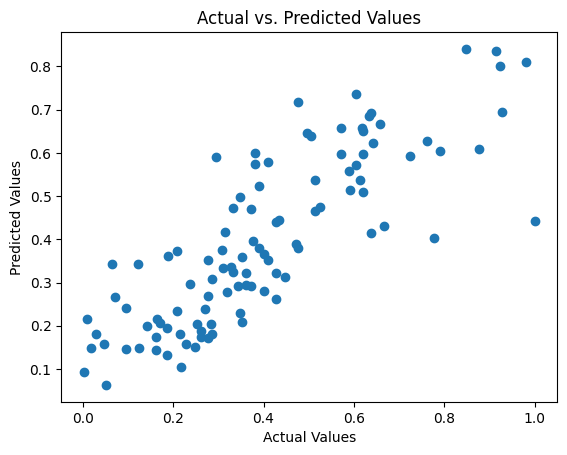

In [206]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

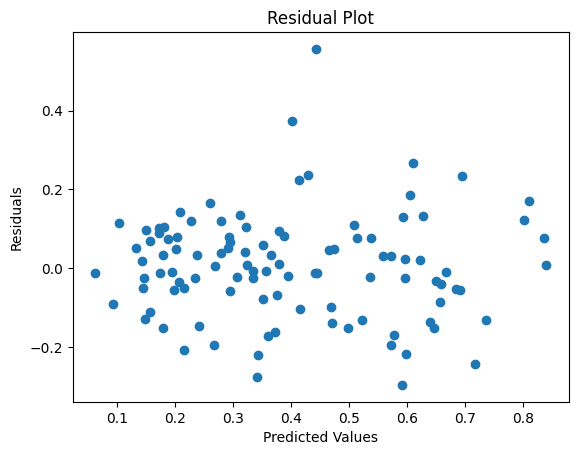

In [207]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Using K-fold Cross validation

In [208]:
from sklearn.model_selection import KFold, cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f"R^2 scores from each fold: {cv_results}")
print(f"Mean R^2 score: {np.mean(cv_results)}")

R^2 scores from each fold: [0.65776015 0.68318457 0.78407429 0.61277265 0.59798006 0.38456071
 0.40573369 0.63617872 0.64627366 0.7073906 ]
Mean R^2 score: 0.6115909110769534


In [209]:
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Negative mean squared scores from each fold: {cv_results}")
print(f"Mean Negative mean squared score: {np.mean(cv_results)}")

Negative mean squared scores from each fold: [-0.01506894 -0.02029089 -0.01194263 -0.02426302 -0.01536496 -0.01142127
 -0.02415012 -0.01675461 -0.01752995 -0.01209448]
Mean Negative mean squared score: -0.016888088218819396


Using k-fold crass validation with 10 splits we get a mean squared error of 0.0169 and a r-squared error of 0.612